A)


One question that could be asked as a telecommunications service provider could be:

What correlation exists between churn, the Outage_sec_perweek, and MonthlyCharge?

B)



| Name                  | Type     | Example                             |
|-----------------------|----------|-------------------------------------|
| CaseOrder             | int64    | 1                                   |
| Customer_id           | object   | K409198                             |
| Interaction           | object   | aa90260b-4141-4a24-8e36-b04ce1f4f77b|
| City                  | object   | Point Baker                         |
| State                 | object   | AK                                  |
| County                | object   | Prince of Wales-Hyder               |
| Zip                   | int64    | 99927                               |
| Lat                   | float64  | 56.25100                            |
| Lng                   | float64  | -133.37571                          |
| Population            | int64    | 38                                  |
| Area                  | object   | Urban                               |
| Timezone              | object   | America/Sitka                       |
| Job                   | object   | Environmental health practitioner   |
| Children              | float64  | 1.0                                 |
| Age                   | float64  | 68.0                                |
| Education             | object   | Master's Degree                     |
| Employment            | object   | Part Time                           |
| Income                | float64  | 28561.99                            |
| Marital               | object   | Widowed                             |
| Gender                | object   | Male                                |
| Churn                 | object   | No                                  |
| Outage_sec_perweek    | float64  | 6.972566                            |
| Email                 | int64    | 10                                  |
| Contacts              | int64    | 0                                   |
| Yearly_equip_failure  | int64    | 1                                   |
| Techie                | object   | No                                  |
| Contract              | object   | One year                            |
| Port_modem            | object   | Yes                                 |
| Tablet                | object   | Yes                                 |
| InternetService       | object   | Fiber Optic                         |
| Phone                 | object   | Yes                                 |
| Multiple              | object   | No                                  |
| OnlineSecurity        | object   | Yes                                 |
| OnlineBackup          | object   | Yes                                 |
| DeviceProtection      | object   | No                                  |
| TechSupport           | object   | No                                  |
| StreamingTV           | object   | No                                  |
| StreamingMovies       | object   | Yes                                 |
| PaperlessBilling      | object   | Yes                                 |
| PaymentMethod         | object   | Credit Card (automatic)             |
| Tenure                | float64  | 6.795513                            |
| MonthlyCharge         | float64  | 171.449762                          |
| Bandwidth_GB_Year     | float64  | 904.536110                          |
| item1                 | int64    | 5                                   |
| item2                 | int64    | 5                                   |
| item3                 | int64    | 5                                   |
| item4                 | int64    | 3                                   |
| item5                 | int64    | 4                                   |
| item6                 | int64    | 0                                   |
| item7                 | int64    | 3                                   |
| item8                 | int64    | 4                                   |


<span style="font-weight:300;font-size:16px">
  


# C)

### 1)


&emsp;&emsp;The first step I will use to assess the data quality is to identify missing values.
In python missing values can be detected with the df.isna().sum() function and its variations such as df.iloc[5].isna().sum()


&emsp;&emsp;The second step I will use to assess the data quality is to identify duplicates rows based on customer_id column. I will do this with the pandas library with the df.duplicated()function. Duplicate rows can also be identifed based on a subset of columns such as
df.duplicated(subset=['Customer_id']).


&emsp;&emsp;The third step I will use to assess the data quality is to identify outliers. I will use the python describe() function first to check if further analysis is needed. I will identify outliers with frequency counts such as df['Your_Column_Name'].value_counts(), z-scores such as zscore(df[column_name]), or plot a histogram such as df['values'].hist() plt.show(). I will also plot histograms of categorical and numeric data values counts such as
plt.bar(category_counts.index, category_counts.values) with the matplotlib library.
  
  
  
### 2)
   
   
&emsp;&emsp;This is an effective approach to assess the quality of the data set because it addresses several quality metrics such as outliers, duplicates, and missingness. The python libraries and functions used are effective at working on large data sets. This approach also accounts for the characteristics of the data. Histograms, frequency counts, and the describe() function can be used on categorical data to identify outliers, while z-scores are preferred for numerical data.
 
 

### 3)


&emsp;&emsp;Python and the matplotlib, pandas, and scipy library are a good choice for data cleaning on this project. One reason is that I am familiar with python language. Another reason is that python and the associated libraries automate a lot of the statistical work. Stats.z-scores will return the z-scores of the data in one step so you don't have to do each step manually to calculate the z-score for each data point. Python and the associated libraries also have related functions that can mitigate some of the data quality issues as well as identifying them.

</span>




In [1]:
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Assuming your CSV file is named 'data.csv', adjust the file path as needed
file_path = '/home/dj/skewl/d206/churn_raw_data.csv'
pd.set_option('display.max_columns', None)
# Read the data from the CSV file into a DataFrame
df = pd.read_csv(file_path)
#drop index column
df = df.loc[:, ~df.columns.str.contains('Unnamed')]

# DETECTION STEPS

In [2]:

# Identify missing values using isna() method
missing_values = df.isna().sum()
# Print DataFrame with True for missing values and False for non-missing values
print(missing_values)

# found lots of missing values here!

CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtecti

In [3]:
#function to reset data
def reset_data():
    import pandas as pd
    file_path = '/home/dj/skewl/d206/churn_raw_data.csv'
    pd.set_option('display.max_columns', None)
    # Read the data from the CSV file into a DataFrame
    global df
    df = pd.read_csv(file_path)
    df = df.loc[:, ~df.columns.str.contains('Unnamed')]

In [4]:
# Find duplicate rows 
duplicate_rows = df.duplicated(["Customer_id", "Interaction"]).sum()

# Print duplicate rows   # found NO duplicate rows here!
print(duplicate_rows)


0


In [5]:
#function to list outliers by Z-score

def get_outliers_z(col_name):
    
    df['zscore'] = zscore(df[col_name])
    outliers = df.query('zscore > 3 | zscore < -3')
    print(f"number of outliers= {len(outliers)}")
    print(f"\n Z-score of outliers= \n{outliers['zscore']}")
    del df['zscore']


In [6]:
#function to list outliers by interquartile range

def get_iqr_outliers(col_name):
    # calculate IQR for column Height
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1

    # identify outliers
    threshold = 1.5
    outliers = df[(df[col_name] < Q1 - threshold * IQR) | (df[col_name] > Q3 + threshold * IQR)]
    print(f"outliers = {len(outliers)}")


In [7]:
#function to plot histogram
def plot_hist(col_name, num_bins, do_rotate=False):
    plt.hist(df[col_name], bins=num_bins)
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col_name}')
    if do_rotate:
        plt.xticks(rotation=90)
    plt.show()


In [8]:
# print row count that matches a value
def row_count_by_value(value):
    
    value_to_match = value
    row_count_matching_value = (df == value_to_match).sum()
    print(row_count_matching_value)

In [9]:
def print_counts(col_name):
    print(df[col_name].value_counts())

In [10]:
#function to print missing values
def print_desc(col_name):
    print(df[col_name].describe())
    print(f"missing values= {df[col_name].isna().sum()}")

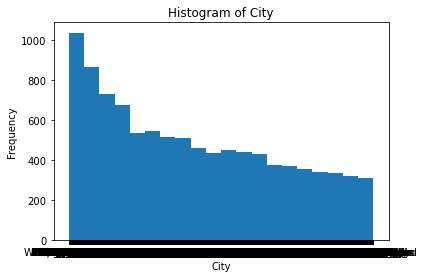

count       10000
unique       6058
top       Houston
freq           34
Name: City, dtype: object
missing values= 0


In [11]:
#looks good
plot_hist("City",20)
print_desc("City")

In [12]:
#looks good
print_desc("State")

count     10000
unique       52
top          TX
freq        603
Name: State, dtype: object
missing values= 0


In [13]:
#no issues here
print_desc("CaseOrder")

count    10000.00000
mean      5000.50000
std       2886.89568
min          1.00000
25%       2500.75000
50%       5000.50000
75%       7500.25000
max      10000.00000
Name: CaseOrder, dtype: float64
missing values= 0


In [14]:
#no issues here
print_desc("State")

count     10000
unique       52
top          TX
freq        603
Name: State, dtype: object
missing values= 0


In [15]:
#no issues here
print_desc("Interaction")

count                                    10000
unique                                   10000
top       aa90260b-4141-4a24-8e36-b04ce1f4f77b
freq                                         1
Name: Interaction, dtype: object
missing values= 0


In [16]:
#no issues
print_desc("Customer_id")

count       10000
unique      10000
top       K409198
freq            1
Name: Customer_id, dtype: object
missing values= 0


In [17]:
#no issues
print_desc("County")

count          10000
unique          1620
top       Washington
freq             111
Name: County, dtype: object
missing values= 0


In [18]:
# there's a problem here because this should be an int. Note the min value!
print_desc("Zip")

count    10000.000000
mean     49153.319600
std      27532.196108
min        601.000000
25%      26292.500000
50%      48869.500000
75%      71866.500000
max      99929.000000
Name: Zip, dtype: float64
missing values= 0


In [19]:
#looks good
print_desc("Lat")

count    10000.000000
mean        38.757567
std          5.437389
min         17.966120
25%         35.341828
50%         39.395800
75%         42.106908
max         70.640660
Name: Lat, dtype: float64
missing values= 0


In [20]:
#looks good
print_desc("Lng")

count    10000.000000
mean       -90.782536
std         15.156142
min       -171.688150
25%        -97.082812
50%        -87.918800
75%        -80.088745
max        -65.667850
Name: Lng, dtype: float64
missing values= 0


count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64
missing values= 0


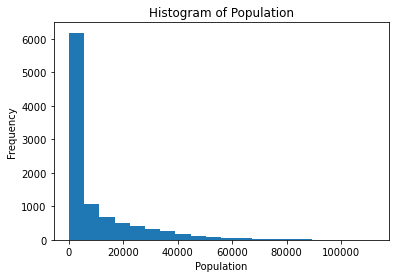

In [21]:

#this could be bad data. There is 6000 places with 0 population according to census.
#change this to int

print_desc("Population")
plot_hist("Population",20)

count        10000
unique           3
top       Suburban
freq          3346
Name: Area, dtype: object
missing values= 0


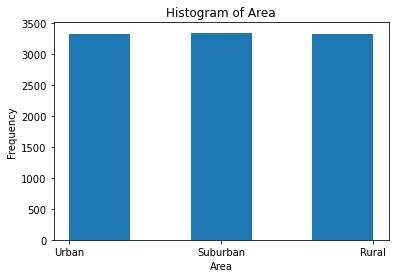

In [22]:
#looks good. Equal distribution.
print_desc("Area")
plot_hist("Area",5)

In [23]:
# something wrong. There should only be 24 timezones!
print_desc("Timezone")
df["Timezone"].value_counts()

count                10000
unique                  25
top       America/New_York
freq                  4072
Name: Timezone, dtype: object
missing values= 0


America/New_York                  4072
America/Chicago                   3672
America/Los_Angeles                887
America/Denver                     552
America/Detroit                    265
America/Indiana/Indianapolis       186
America/Phoenix                    104
America/Boise                       57
America/Anchorage                   55
America/Puerto_Rico                 40
Pacific/Honolulu                    35
America/Menominee                   16
America/Nome                        12
America/Kentucky/Louisville         10
America/Sitka                        8
America/Indiana/Vincennes            6
America/Indiana/Tell_City            6
America/Toronto                      5
America/Indiana/Petersburg           4
America/Juneau                       2
America/North_Dakota/New_Salem       2
America/Indiana/Knox                 1
America/Indiana/Winamac              1
America/Indiana/Marengo              1
America/Ojinaga                      1
Name: Timezone, dtype: in

In [24]:
#looks good
print_desc("Job")

count                         10000
unique                          639
top       Occupational psychologist
freq                             30
Name: Job, dtype: object
missing values= 0


count    7505.000000
mean        2.095936
std         2.154758
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        10.000000
Name: Children, dtype: float64
missing values= 2495


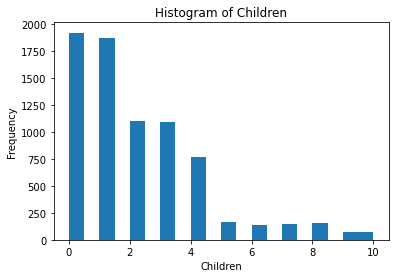

In [25]:
#lots of missing values change to int and impute
print_desc("Children")
plot_hist("Children",20)

count    7525.000000
mean       53.275748
std        20.753928
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64
missing values= 2475


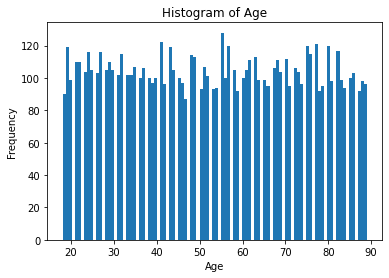

In [68]:
#lots of missing values change to int and impute.
print_desc("Age")
plot_hist("Age",100)

count                           10000
unique                             12
top       Regular High School Diploma
freq                             2421
Name: Education, dtype: object
missing values= 0


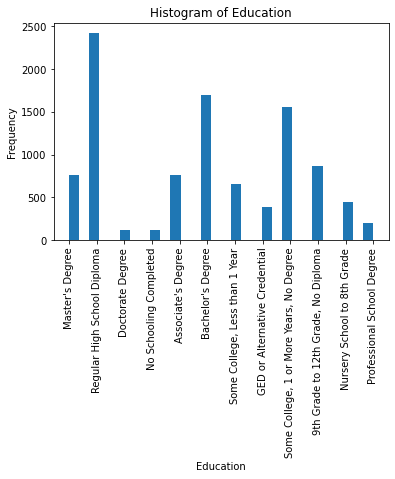

In [27]:
#looks good
print_desc("Education")
plot_hist("Education",30,True)

count         10000
unique            5
top       Full Time
freq           5992
Name: Employment, dtype: object
missing values= 0


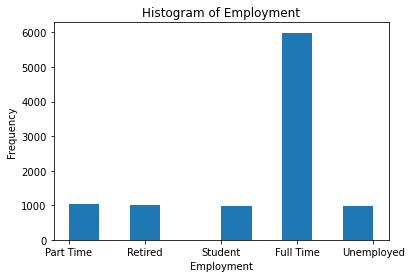

In [70]:
#looks good
print_desc("Employment")
plot_hist("Employment",10)

count      7510.000000
mean      39936.762226
std       28358.469482
min         740.660000
25%       19285.522500
50%       33186.785000
75%       53472.395000
max      258900.700000
Name: Income, dtype: float64
missing values= 2490


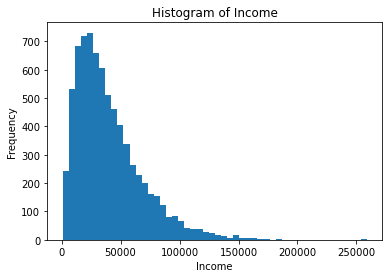

In [29]:
#this is bad data because there is so many missing values.
print_desc("Income")
plot_hist("Income",50)

In [30]:
#looks good
print_desc("Marital")
print_counts("Marital")

count        10000
unique           5
top       Divorced
freq          2092
Name: Marital, dtype: object
missing values= 0
Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: Marital, dtype: int64


In [31]:
#looks good
print_desc("Gender")
print_counts("Gender")

count      10000
unique         3
top       Female
freq        5025
Name: Gender, dtype: object
missing values= 0
Female                  5025
Male                    4744
Prefer not to answer     231
Name: Gender, dtype: int64


In [32]:
#looks good
print_desc("Churn")
print_counts("Churn")

count     10000
unique        2
top          No
freq       7350
Name: Churn, dtype: object
missing values= 0
No     7350
Yes    2650
Name: Churn, dtype: int64


count    10000.000000
mean        11.452955
std          7.025921
min         -1.348571
25%          8.054362
50%         10.202896
75%         12.487644
max         47.049280
Name: Outage_sec_perweek, dtype: float64
missing values= 0


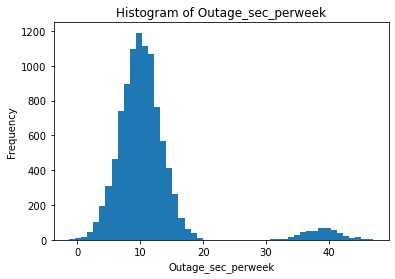

number of outliers= 491

 Z-score of outliers= 
28      4.622272
36      4.735879
40      3.907495
61      4.046782
130     4.020157
          ...   
9894    4.703786
9895    4.160788
9907    3.853321
9945    3.968939
9950    4.201985
Name: zscore, Length: 491, dtype: float64


In [33]:
#need to drop the rows with negative values
print_desc("Outage_sec_perweek")
plot_hist("Outage_sec_perweek",50)
get_outliers_z("Outage_sec_perweek")

In [34]:
#looks good
print_desc("Email")

count    10000.000000
mean        12.016000
std          3.025898
min          1.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         23.000000
Name: Email, dtype: float64
missing values= 0


In [35]:
#looks good but change this to int!
print_desc("Contacts")

count    10000.000000
mean         0.994200
std          0.988466
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Contacts, dtype: float64
missing values= 0


In [36]:
#looks good but change this to Int!
print_desc("Yearly_equip_failure")

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64
missing values= 0


In [37]:
#lots of missing values. Need to impute
print_desc("Techie")

count     7523
unique       2
top         No
freq      6266
Name: Techie, dtype: object
missing values= 2477


In [38]:
#looks good
print_desc("Contract")
print_counts("Contract")

count              10000
unique                 3
top       Month-to-month
freq                5456
Name: Contract, dtype: object
missing values= 0
Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64


In [39]:
#looks good
print_desc("Port_modem")

count     10000
unique        2
top          No
freq       5166
Name: Port_modem, dtype: object
missing values= 0


In [40]:
#looks good
print_desc("Tablet")

count     10000
unique        2
top          No
freq       7009
Name: Tablet, dtype: object
missing values= 0


In [41]:
#looks good
print_desc("InternetService")
print_counts("InternetService")

count           10000
unique              3
top       Fiber Optic
freq             4408
Name: InternetService, dtype: object
missing values= 0
Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64


In [42]:
#missing a lot of values
print_desc("Phone")
print_counts("Phone")

count     8974
unique       2
top        Yes
freq      8128
Name: Phone, dtype: object
missing values= 1026
Yes    8128
No      846
Name: Phone, dtype: int64


In [43]:
#looks good
print_desc("Multiple")
print_counts("Multiple")

count     10000
unique        2
top          No
freq       5392
Name: Multiple, dtype: object
missing values= 0
No     5392
Yes    4608
Name: Multiple, dtype: int64


In [44]:
#looks good
print_desc("OnlineSecurity")
print_counts("OnlineSecurity")

count     10000
unique        2
top          No
freq       6424
Name: OnlineSecurity, dtype: object
missing values= 0
No     6424
Yes    3576
Name: OnlineSecurity, dtype: int64


In [45]:
#looks good
print_desc("DeviceProtection")
print_counts("DeviceProtection")

count     10000
unique        2
top          No
freq       5614
Name: DeviceProtection, dtype: object
missing values= 0
No     5614
Yes    4386
Name: DeviceProtection, dtype: int64


In [46]:
#lots of missing values here
print_desc("TechSupport")
print_counts("TechSupport")

count     9009
unique       2
top         No
freq      5635
Name: TechSupport, dtype: object
missing values= 991
No     5635
Yes    3374
Name: TechSupport, dtype: int64


In [47]:
#looks good
print_desc("StreamingTV")
print_counts("StreamingTV")

count     10000
unique        2
top          No
freq       5071
Name: StreamingTV, dtype: object
missing values= 0
No     5071
Yes    4929
Name: StreamingTV, dtype: int64


In [48]:
#looks good
print_desc("StreamingMovies")
print_counts("StreamingMovies")

count     10000
unique        2
top          No
freq       5110
Name: StreamingMovies, dtype: object
missing values= 0
No     5110
Yes    4890
Name: StreamingMovies, dtype: int64


In [49]:
#looks good
print_desc("PaperlessBilling")
print_counts("PaperlessBilling")

count     10000
unique        2
top         Yes
freq       5882
Name: PaperlessBilling, dtype: object
missing values= 0
Yes    5882
No     4118
Name: PaperlessBilling, dtype: int64


In [50]:
#looks good
print_desc("PaymentMethod")
print_counts("PaymentMethod")

count                10000
unique                   4
top       Electronic Check
freq                  3398
Name: PaymentMethod, dtype: object
missing values= 0
Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: PaymentMethod, dtype: int64


In [51]:
#lots of missing values!
print_desc("Tenure")

count    9069.000000
mean       34.498858
std        26.438904
min         1.000259
25%         7.890442
50%        36.196030
75%        61.426670
max        71.999280
Name: Tenure, dtype: float64
missing values= 931


In [52]:
#looks good
print_desc("MonthlyCharge")

count    10000.000000
mean       174.076305
std         43.335473
min         77.505230
25%        141.071078
50%        169.915400
75%        203.777441
max        315.878600
Name: MonthlyCharge, dtype: float64
missing values= 0


In [53]:
#lots of missing values here!
print_desc("Bandwidth_GB_Year")

count    8979.000000
mean     3398.842752
std      2187.396807
min       155.506715
25%      1234.110529
50%      3382.424000
75%      5587.096500
max      7158.982000
Name: Bandwidth_GB_Year, dtype: float64
missing values= 1021


In [54]:
#looks good but change to int
print_desc("item1")

count    10000.000000
mean         3.490800
std          1.037797
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: item1, dtype: float64
missing values= 0


In [55]:
#looks good but change to int
print_desc("item2")

count    10000.000000
mean         3.505100
std          1.034641
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: item2, dtype: float64
missing values= 0


In [56]:
#looks good but change to int
print_desc("item3")

count    10000.000000
mean         3.487000
std          1.027977
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: item3, dtype: float64
missing values= 0


In [57]:
#looks good but change to int
print_desc("item4")

count    10000.000000
mean         3.497500
std          1.025816
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: item4, dtype: float64
missing values= 0


In [58]:
#looks good but change to int
print_desc("item5")

count    10000.000000
mean         3.492900
std          1.024819
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: item5, dtype: float64
missing values= 0


In [59]:
#looks good but change to int
print_desc("item6")

count    10000.000000
mean         3.497300
std          1.033586
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: item6, dtype: float64
missing values= 0


In [60]:
#looks good but change to int
print_desc("item7")

count    10000.000000
mean         3.509500
std          1.028502
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: item7, dtype: float64
missing values= 0


In [61]:
#looks good but change to int
print_desc("item8")

count    10000.000000
mean         3.495600
std          1.028633
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: item8, dtype: float64
missing values= 0


# CLEAN UP STEPS

count      7510.000000
mean      39936.762226
std       28358.469482
min         740.660000
25%       19285.522500
50%       33186.785000
75%       53472.395000
max      258900.700000
Name: Income, dtype: float64
missing values= 2490


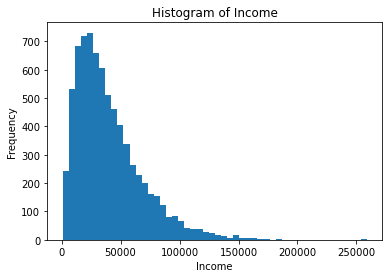

count     10000.000000
mean      39936.762226
std       24575.114845
min         740.660000
25%       23660.790000
50%       39936.762226
75%       45504.192500
max      258900.700000
Name: Income, dtype: float64
missing values= 0


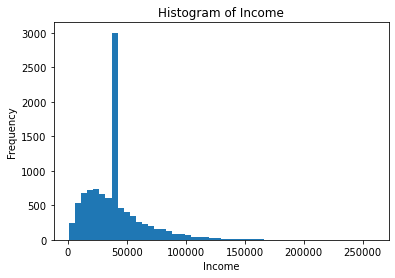

In [76]:
#this works crappy
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
 # now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
print_desc("Income")
plot_hist("Income",50)
imputer = IterativeImputer()
df['Income'] = imputer.fit_transform(df[['Income']])
print_desc("Income")
plot_hist("Income",50)

In [77]:
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({'A': [1, 2, 3, 4],
                   'B': [5, 6, 7, 8]})

# Store column 'B' in a variable
column_b = df['B']

# Modify the column (e.g., add 10 to each value)
column_b += 10

# Add the modified column back to the DataFrame
df['B'] = column_b

print(df)

   A   B
0  1  15
1  2  16
2  3  17
3  4  18


In [75]:
#replace missing values in children with 0
#df['Children'] = df['Children'].fillna(0)


In [63]:
# change data type to int because children are whole numbers
#df['Children'] = df['Children'].astype(int)


In [64]:
#replace missing values and convert to int
#df['Age'] = df['Age'].fillna(0)
#df['Age'] = df['Age'].astype(int)

In [65]:
#replace missing values
#df['Income'] = df['Income'].fillna(0)


In [66]:
#replace missing values
#df['Techie'] = df['Techie'].fillna("No")

In [67]:
#df['Phone'] = df['Phone'].fillna("No")